### SOMMAIRE

0. [DESCRIPTION DU PROJET](#0.-DESCRIPTION-DU-PROJET)

1. [LIBRAIRIES DE BASE](#1.-LIBRAIRIES-DE-BASE)

2. [IMPORTATION ET STRUCTURE DU JEU DE DONNEES](#2.-IMPORTATION-ET-STRUCTURE-DU-JEU-DE-DONNEES)

3. [CATEGORISATION DES VARIABLES POUR ANALYSES](#3.-CATEGORISATION-DES-VARIABLES-POUR-ANALYSES)

4. [ANALYSES EXPLORATOIRES DES DONNEES](#4.-ANALYSES-EXPLORATOIRES-DES-DONNEES)

5. [CONCLUSION D'ETAPE](#5.-CONCLUSION-D'ETAPE)

6. [SEPARATION DES VARIABLES ET DU JEU DE DONNEES](#6.-SEPARATION-DES-VARIABLES-ET-DU-JEU-DE-DONNEES)

7. [PREPROCESSING, MODELISATION, EVALUATIONS ET CHOIX MEILLEUR MODELE](#7.-PREPROCESSING,-MODELISATION,-EVALUATIONS-ET-CHOIX-MEILLEUR-MODELE)

8. [CONCLUSION FINALE](#8.-CONCLUSION-FINALE)

#### 0. DESCRIPTION DU PROJET

Les données que nous étudierons ici contiennent des informations sur les paiements par défaut, les facteurs démographiques, les données de crédit, l'historique des paiements et les relevés de compte des clients de cartes de crédit à Taïwan d'avril 2005 à septembre 2005.

#### 1. LIBRAIRIES DE BASE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importation des fonctions
from risk_utils import*

#### 2. IMPORTATION ET STRUCTURE DU JEU DE DONNEES

In [3]:
data = importer_affichage_dataset('default of credit card clients.xls')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### 2.1 Structure de la base de données

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

- Nous avons 30.000 observations dans la base;
- Pas de valeurs manquantes;
- La base de données indique 25 variables et toutes sont de type entier

DICTIONNAIRE DES DONNEES

Comme relevé plus haut, il y a 25 variables:

- <b>ID :</b> ID de chaque client

- <b>LIMIT_BAL :</b> Montant du crédit accordé en dollars Taiwanais (comprend le crédit individuel et familial/supplémentaire)

- <b>SEX :</b> Genre (1=masculin, 2=feminin)

- <b>EDUCATION :</b> (1=école supérieure, 2=Université, 3=Lycée, 4=Autres, 5=Inconnu, 6=Inconnu)

- <b>MARRIAGE :</b> État civil (1=marié, 2=célibataire, 3=autres)

- <b>AGE :</b> Age en années

- <b>PAY_0 :</b> État de remboursement en septembre 2005 (-1=paiement régulier, 1=retard de paiement d'un mois, 2=retard de paiement de deux mois, … 8=retard de paiement de huit mois, 9=retard de paiement de neuf mois et plus)

- <b>PAY_2 :</b> État de remboursement en août 2005 (échelle identique à celle ci-dessus)

- <b>PAY_3 :</b> État de remboursement en juillet 2005 (échelle identique à celle ci-dessus)

- <b>PAY_4 :</b> État de remboursement en juin 2005 (échelle identique à celle ci-dessus)

- <b>PAY_5 :</b> État de remboursement en mai 2005 (échelle identique à celle ci-dessus)

- <b>PAY_6 :</b> État de remboursement en avril 2005 (échelle identique à celle ci-dessus)

- <b>BILL_AMT1 :</b> Montant du relevé de facture en septembre 2005 (dollar Taiwanais)

- <b>BILL_AMT2 :</b> Montant du relevé de facture en Août 2005 (dollar Taiwanais)

- <b>BILL_AMT3 :</b> Montant du relevé de facture en juillet 2005 (dollar Taiwanais)

- <b>BILL_AMT4 :</b> Montant du relevé de facture en juin 2005 (dollar Taiwanais)

- <b>BILL_AMT5 :</b> Montant du relevé de facture en mai 2005 (dollar Taiwanais)

- <b>BILL_AMT6 :</b> Montant du relevé de facture en avril 2005 (dollar Taiwanais)

- <b>PAY_AMT1 :</b> Montant du paiement précédent en septembre 2005 (dollar Taiwanais)

- <b>PAY_AMT2 :</b> Montant du paiement précédent en Août 2005 (dollar Taiwanais)

- <b>PAY_AMT3 :</b> Montant du paiement précédent en juillet 2005 (dollar Taiwanais)

- <b>PAY_AMT4 :</b> Montant du paiement précédent en juin 2005 (dollar Taiwanais)

- <b>PAY_AMT5 :</b> Montant du paiement précédent en mai 2005 (dollar Taiwanais)

- <b>PAY_AMT6 :</b> Montant du paiement précédent en avril 2005 (dollar Taiwanais)

- <b><i>Paiement par défaut le mois prochain </i>:</b> défaut de paiement (1=yes, 0=no)

A la lecture du dictionnaire des données, contrairement à ce que le jeu de données initialement importé nous présente, nous constatons que certaines variables doivent être de type catégoriel. Ces variables sont : 
- SEX
- EDUCATION
- MARRIAGE
- PAY_0
- PAY_2
- PAY_3
- PAY_4
- PAY_5
- PAY_6
- default payment next month

In [5]:
# Formatage du dataset
df = transform_dataset(data)

In [6]:
df = importer_affichage_dataset('default_of_credit_card_clients.csv')
df.head()

,limit_bal,sex,education,marriage,age,payment_status_sept,payment_status_aug,payment_status_july,payment_status_june,payment_status_may,...,bill_status_june,bill_status_may,bill_status_april,previous_payment_sept,previous_payment_aug,previous_payment_july,previous_payment_june,previous_payment_may,previous_payment_april,default_payment_next_month
0,20000,Female,University,Married,24,delayed 2 month,delayed 2 month,Payed duly,Payed duly,No consumption,...,0,0,0,0,689,0,0,0,0,Yes
1,120000,Female,University,Single,26,Payed duly,delayed 2 month,Use of revolving credit,Use of revolving credit,Use of revolving credit,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,90000,Female,University,Single,34,Use of revolving credit,Use of revolving credit,Use of revolving credit,Use of revolving credit,Use of revolving credit,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,50000,Female,University,Married,37,Use of revolving credit,Use of revolving credit,Use of revolving credit,Use of revolving credit,Use of revolving credit,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,50000,Male,University,Married,57,Payed duly,Use of revolving credit,Payed duly,Use of revolving credit,Use of revolving credit,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   limit_bal                   30000 non-null  int64 
 1   sex                         30000 non-null  object
 2   education                   30000 non-null  object
 3   marriage                    30000 non-null  object
 4   age                         30000 non-null  int64 
 5   payment_status_sept         30000 non-null  object
 6   payment_status_aug          30000 non-null  object
 7   payment_status_july         30000 non-null  object
 8   payment_status_june         30000 non-null  object
 9   payment_status_may          30000 non-null  object
 10  payment_status_april        30000 non-null  object
 11  bill_status_sept            30000 non-null  int64 
 12  bill_status_aug             30000 non-null  int64 
 13  bill_status_july            30000 non-null  in

In [8]:
df.isnull().sum()

limit_bal                     0
sex                           0
education                     0
marriage                      0
age                           0
payment_status_sept           0
payment_status_aug            0
payment_status_july           0
payment_status_june           0
payment_status_may            0
payment_status_april          0
bill_status_sept              0
bill_status_aug               0
bill_status_july              0
bill_status_june              0
bill_status_may               0
bill_status_april             0
previous_payment_sept         0
previous_payment_aug          0
previous_payment_july         0
previous_payment_june         0
previous_payment_may          0
previous_payment_april        0
default_payment_next_month    0
dtype: int64

#### 2.2 Résume statistique

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
bill_status_sept,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
bill_status_aug,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
bill_status_july,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
bill_status_june,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
bill_status_may,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
bill_status_april,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0
previous_payment_sept,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0
previous_payment_aug,30000.0,5921.163500,23040.870402,0.0,833.00,2009.0,5000.00,1684259.0


#### 3. CATEGORISATION DES VARIABLES POUR ANALYSES

In [10]:
count_variable_types(df)

,Variable Type,Count
0,Categorical,10
1,Numeric,14


#### 4. ANALYSES EXPLORATOIRES DES DONNEES

#### 4.1 Statistiques univariées

Tableau de comptage des valeurs avec pourcentages pour la variable 'sex':

        Comptage  Pourcentage (%)
sex                              
Female     18112            60.37
Male       11888            39.63




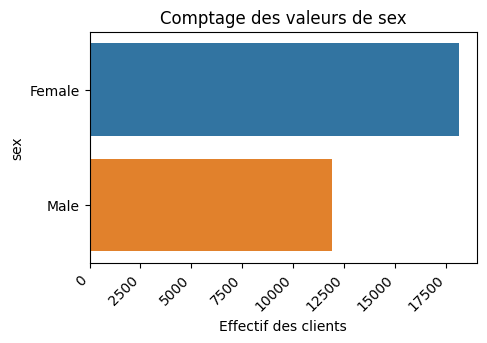

Tableau de comptage des valeurs avec pourcentages pour la variable 'education':

                 Comptage  Pourcentage (%)
education                                 
University          14030            46.77
Graduate school     10585            35.28
High school          4917            16.39
Others                468             1.56




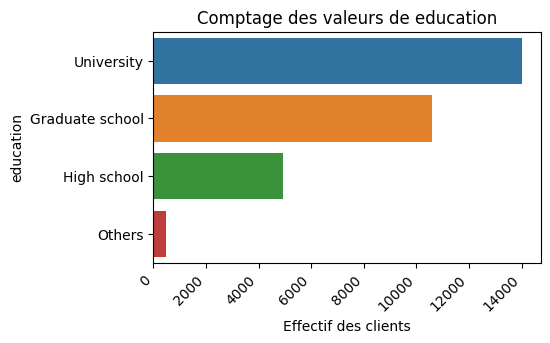

Tableau de comptage des valeurs avec pourcentages pour la variable 'marriage':

          Comptage  Pourcentage (%)
marriage                           
Single       15964            53.21
Married      13659            45.53
Others         377             1.26




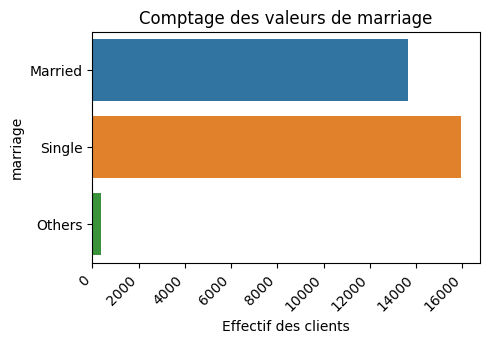

Tableau de comptage des valeurs avec pourcentages pour la variable 'payment_status_sept':

                         Comptage  Pourcentage (%)
payment_status_sept                               
Use of revolving credit     14737            49.12
Payed duly                   5686            18.95
delayed 1 month              3688            12.29
No consumption               2759             9.20
delayed 2 month              2667             8.89
delayed 3 month               322             1.07
delayed 4 month                76             0.25
delayed 5 month                26             0.09
delayed 8 month                19             0.06
delayed 6 month                11             0.04
delayed 7 month                 9             0.03




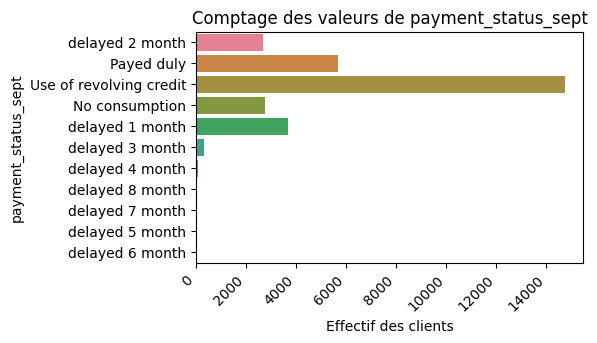

Tableau de comptage des valeurs avec pourcentages pour la variable 'payment_status_aug':

                         Comptage  Pourcentage (%)
payment_status_aug                                
Use of revolving credit     15730            52.43
Payed duly                   6050            20.17
delayed 2 month              3927            13.09
No consumption               3782            12.61
delayed 3 month               326             1.09
delayed 4 month                99             0.33
delayed 1 month                28             0.09
delayed 5 month                25             0.08
delayed 7 month                20             0.07
delayed 6 month                12             0.04
delayed 8 month                 1             0.00




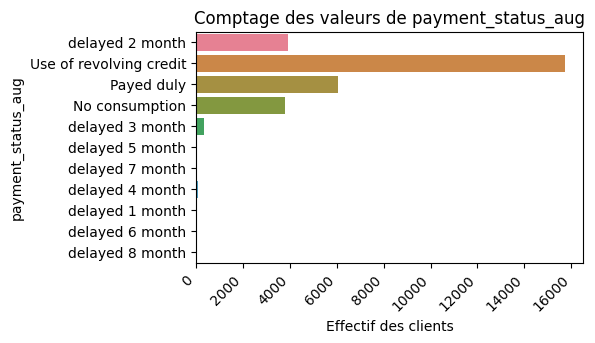

Tableau de comptage des valeurs avec pourcentages pour la variable 'payment_status_july':

                         Comptage  Pourcentage (%)
payment_status_july                               
Use of revolving credit     15764            52.55
Payed duly                   5938            19.79
No consumption               4085            13.62
delayed 2 month              3819            12.73
delayed 3 month               240             0.80
delayed 4 month                76             0.25
delayed 7 month                27             0.09
delayed 6 month                23             0.08
delayed 5 month                21             0.07
delayed 1 month                 4             0.01
delayed 8 month                 3             0.01




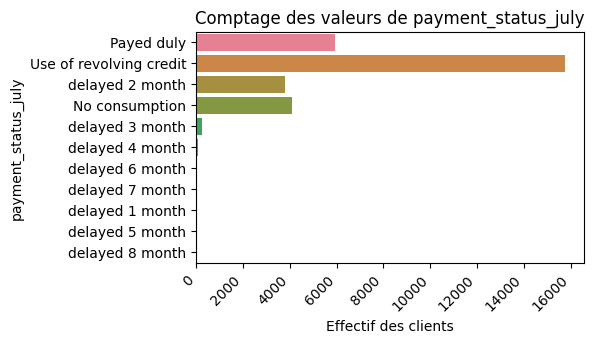

Tableau de comptage des valeurs avec pourcentages pour la variable 'payment_status_june':

                         Comptage  Pourcentage (%)
payment_status_june                               
Use of revolving credit     16455            54.85
Payed duly                   5687            18.96
No consumption               4348            14.49
delayed 2 month              3159            10.53
delayed 3 month               180             0.60
delayed 4 month                69             0.23
delayed 7 month                58             0.19
delayed 5 month                35             0.12
delayed 6 month                 5             0.02
delayed 1 month                 2             0.01
delayed 8 month                 2             0.01




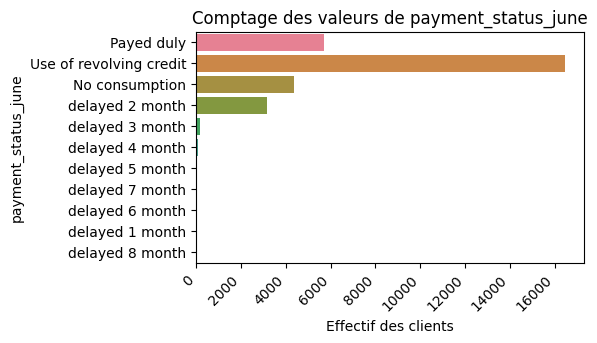

Tableau de comptage des valeurs avec pourcentages pour la variable 'payment_status_may':

                         Comptage  Pourcentage (%)
payment_status_may                                
Use of revolving credit     16947            56.49
Payed duly                   5539            18.46
No consumption               4546            15.15
delayed 2 month              2626             8.75
delayed 3 month               178             0.59
delayed 4 month                84             0.28
delayed 7 month                58             0.19
delayed 5 month                17             0.06
delayed 6 month                 4             0.01
delayed 8 month                 1             0.00




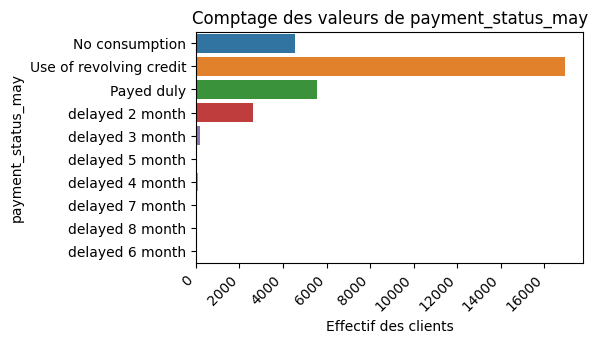

Tableau de comptage des valeurs avec pourcentages pour la variable 'payment_status_april':

                         Comptage  Pourcentage (%)
payment_status_april                              
Use of revolving credit     16286            54.29
Payed duly                   5740            19.13
No consumption               4895            16.32
delayed 2 month              2766             9.22
delayed 3 month               184             0.61
delayed 4 month                49             0.16
delayed 7 month                46             0.15
delayed 6 month                19             0.06
delayed 5 month                13             0.04
delayed 8 month                 2             0.01




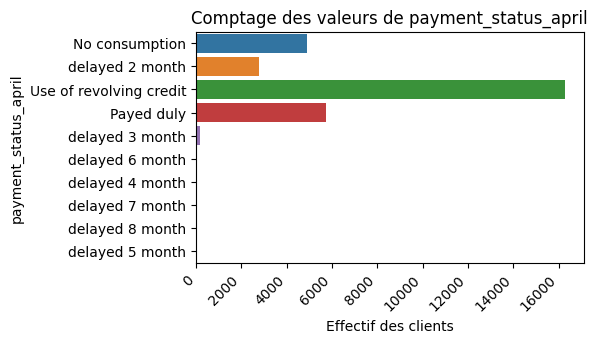

Tableau de comptage des valeurs avec pourcentages pour la variable 'default_payment_next_month':

                            Comptage  Pourcentage (%)
default_payment_next_month                           
No                             23364            77.88
Yes                             6636            22.12




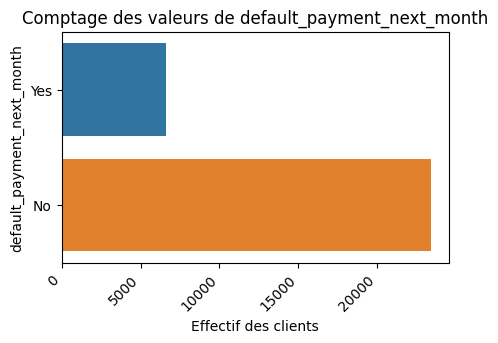

In [11]:
univariate_statistics(df)

##### Analyses univariées

Pour ce qui concerne le genre:
Sur les 30 000 observations de la base de données, 60,37 % de cet effectif global représente les clients de sex féminin contre 39.63 % pour ceux de sexe masculin. 


Pour ce qui concerne l'éducation:
Près de la moitié de l'effectif global des clients de la banque a un parcours universitaire, soit 46.77 % et 35.28 % de cet effectif a fait une école supérieure. Ainsi, 82.05 % des clients de la banque ont suivi des études supérieures. D'autre part, 16.39 % des clients, soit 4917 ne sont pas allés au delà des études secondaires; pour le reste, soit 468 clients (1.56 %) ne sont pas catégorisés. On peut se risquer à affirmer qu'il y a parmi ceux-là, des non scolarisés ou ceux n'ayant pas franchi le cap des études primaires.


Pour ce qui concerne le statut matrimonial:
Les célibataires représentent plus de la moitié des clients de la banque, soit 53.21 %. Ceux qui sont mariés représentent 45.53 % du portefeuille de la banque. Pour le reste, 377 clients de la banque, soit 1.26 % ne sont pas catégorisés du point de vue de leur situation matrimonial.

Pour ce qui concerne l'état des remboursements du mois de Septembre:
Dans le processus de remboursement de crédit, plusieurs tendances se dégagent:
Heureusement pour la banque, moins de 2% (1.54 %) des clients de la banque connaissent des retards de remboursement allant de 3 à 8 mois pour un effectif total de 463 clients.
Le plus grand nombre de clients cumulant des retards de remboursement se situe dans la tranche 1 et 2 mois, pour un ratio cumulé de 21,18 % soit un effectif de 6355 clients.
Cette tendance est globalement confirmée à l'analyse des états de remboursement sur les mois antérieurs. A titre d'illustration, l'état de remboursement du mois d'Avril révèle que seulement 1.03 % des clients de la banque connaissent des retards de remboursement allant de 3 à 8 mois pour un effectif total de 313 clients. A la différence de la situation de Septembre, celle d'Avril nous enseigne le plus grand nombre de clients cumulant des retards de remboursement appartient à la tranche 2 mois, pour un ratio de 9.22 % soit un effectif de 2766 clients.



#### 4.2 Statistiques bivariées

##### 4.2.1 Avec les variables catégorielles et variable cible

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   limit_bal                   30000 non-null  int64 
 1   sex                         30000 non-null  object
 2   education                   30000 non-null  object
 3   marriage                    30000 non-null  object
 4   age                         30000 non-null  int64 
 5   payment_status_sept         30000 non-null  object
 6   payment_status_aug          30000 non-null  object
 7   payment_status_july         30000 non-null  object
 8   payment_status_june         30000 non-null  object
 9   payment_status_may          30000 non-null  object
 10  payment_status_april        30000 non-null  object
 11  bill_status_sept            30000 non-null  int64 
 12  bill_status_aug             30000 non-null  int64 
 13  bill_status_july            30000 non-null  in

Tableau de comptage des valeurs avec pourcentages pour la variable 'sex':

        Default_Yes  Ratio_Yes  Default_No  Ration_No
sex                                                  
Female         3763      56.71       14349      61.41
Male           2873      43.29        9015      38.59




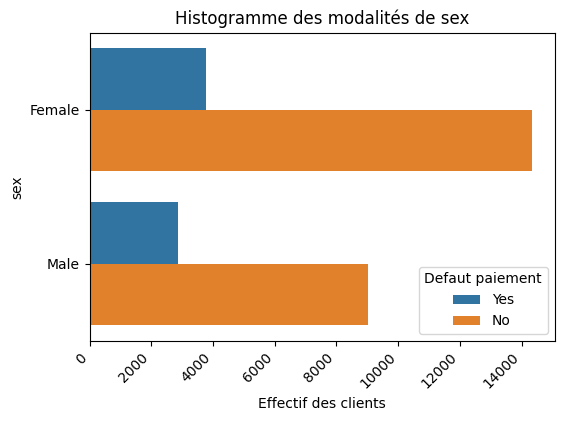

Tableau de comptage des valeurs avec pourcentages pour la variable 'education':

                 Default_Yes  Ratio_Yes  Default_No  Ration_No
education                                                     
University              3330      50.18       10700      45.80
Graduate school         2036      30.68        8549      36.59
High school             1237      18.64        3680      15.75
Others                    33       0.50         435       1.86




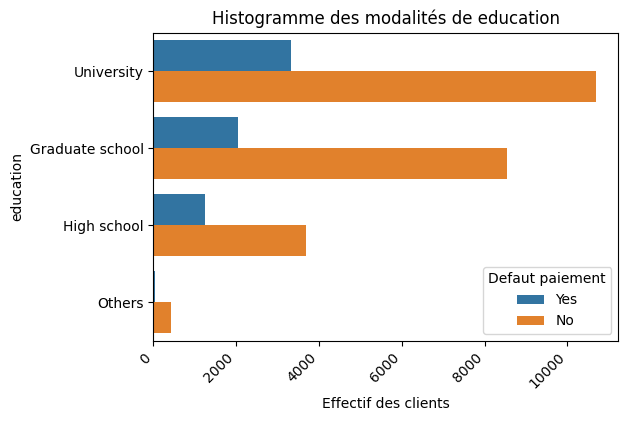

Tableau de comptage des valeurs avec pourcentages pour la variable 'marriage':

          Default_Yes  Ratio_Yes  Default_No  Ration_No
marriage                                               
Single           3341      50.35       12623      54.03
Married          3206      48.31       10453      44.74
Others             89       1.34         288       1.23




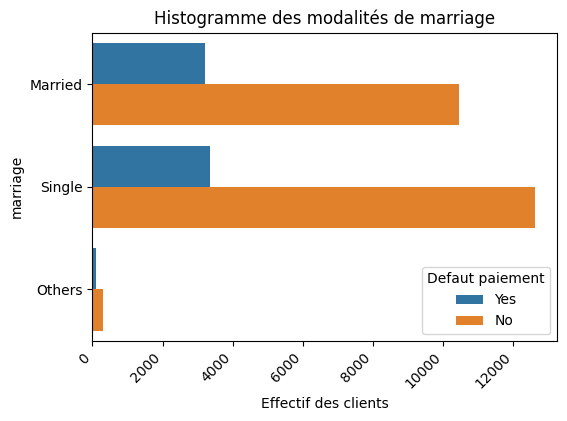

Tableau de comptage des valeurs avec pourcentages pour la variable 'payment_status_sept':

                         Default_Yes  Ratio_Yes  Default_No  Ration_No
payment_status_sept                                                   
Use of revolving credit         1888      28.45       12849      54.99
delayed 2 month                 1844      27.79         823       3.52
delayed 1 month                 1252      18.87        2436      10.43
Payed duly                       954      14.38        4732      20.25
No consumption                   365       5.50        2394      10.25
delayed 3 month                  244       3.68          78       0.33
delayed 4 month                   52       0.78          24       0.10
delayed 5 month                   13       0.20          13       0.06
delayed 8 month                   11       0.17           8       0.03
delayed 7 month                    7       0.11           2       0.01
delayed 6 month                    6       0.09          

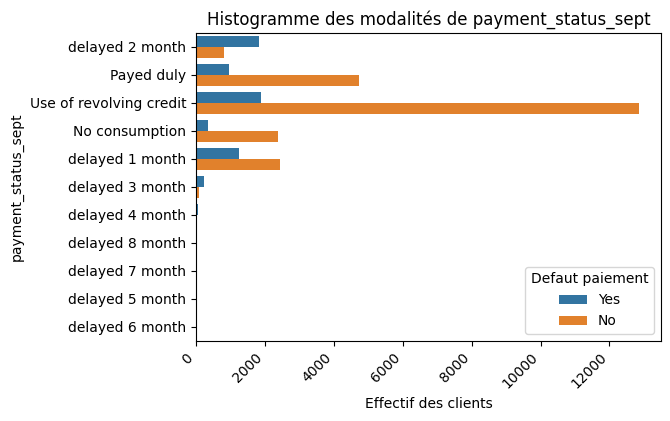

Tableau de comptage des valeurs avec pourcentages pour la variable 'payment_status_aug':

                         Default_Yes  Ratio_Yes  Default_No  Ration_No
payment_status_aug                                                    
Use of revolving credit       2503.0      37.72       13227      56.61
delayed 2 month               2184.0      32.91        1743       7.46
Payed duly                     966.0      14.56        5084      21.76
No consumption                 691.0      10.41        3091      13.23
delayed 3 month                201.0       3.03         125       0.54
delayed 4 month                 50.0       0.75          49       0.21
delayed 5 month                 15.0       0.23          10       0.04
delayed 7 month                 12.0       0.18           8       0.03
delayed 6 month                  9.0       0.14           3       0.01
delayed 1 month                  5.0       0.08          23       0.10
delayed 8 month                  NaN        NaN           

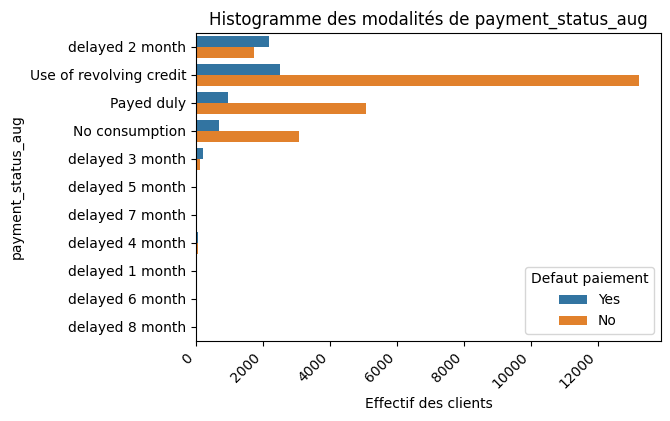

Tableau de comptage des valeurs avec pourcentages pour la variable 'payment_status_july':

                         Default_Yes  Ratio_Yes  Default_No  Ration_No
payment_status_july                                                   
Use of revolving credit         2751      41.46       13013      55.70
delayed 2 month                 1969      29.67        1850       7.92
Payed duly                       926      13.95        5012      21.45
No consumption                   757      11.41        3328      14.24
delayed 3 month                  138       2.08         102       0.44
delayed 4 month                   44       0.66          32       0.14
delayed 7 month                   22       0.33           5       0.02
delayed 6 month                   14       0.21           9       0.04
delayed 5 month                   12       0.18           9       0.04
delayed 8 month                    2       0.03           1       0.00
delayed 1 month                    1       0.02          

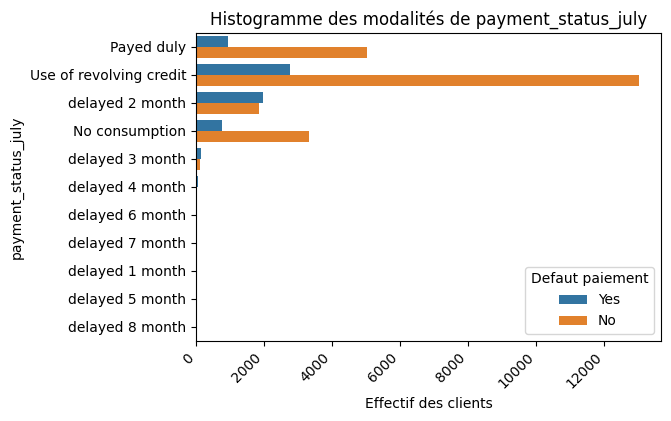

Tableau de comptage des valeurs avec pourcentages pour la variable 'payment_status_june':

                         Default_Yes  Ratio_Yes  Default_No  Ration_No
payment_status_june                                                   
Use of revolving credit         3016      45.45       13439      57.52
delayed 2 month                 1653      24.91        1506       6.45
Payed duly                       904      13.62        4783      20.47
No consumption                   837      12.61        3511      15.03
delayed 3 month                  110       1.66          70       0.30
delayed 7 month                   48       0.72          10       0.04
delayed 4 month                   46       0.69          23       0.10
delayed 5 month                   18       0.27          17       0.07
delayed 6 month                    2       0.03           3       0.01
delayed 8 month                    1       0.02           1       0.00
delayed 1 month                    1       0.02          

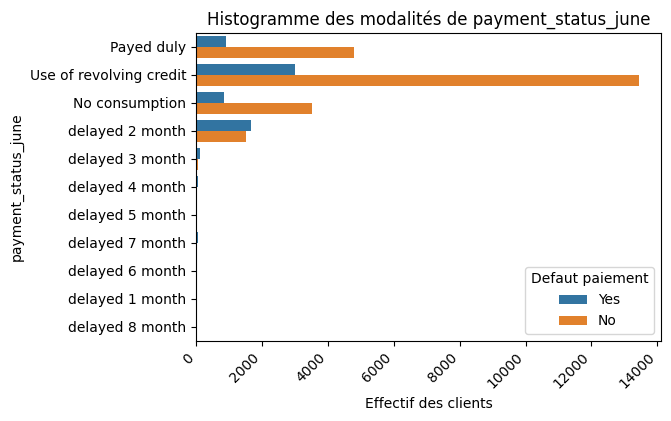

Tableau de comptage des valeurs avec pourcentages pour la variable 'payment_status_may':

                         Default_Yes  Ratio_Yes  Default_No  Ration_No
payment_status_may                                                    
Use of revolving credit         3195      48.15     13752.0      58.86
delayed 2 month                 1423      21.44      1203.0       5.15
Payed duly                       897      13.52      4642.0      19.87
No consumption                   895      13.49      3651.0      15.63
delayed 3 month                  113       1.70        65.0       0.28
delayed 4 month                   51       0.77        33.0       0.14
delayed 7 month                   48       0.72        10.0       0.04
delayed 5 month                   10       0.15         7.0       0.03
delayed 6 month                    3       0.05         1.0       0.00
delayed 8 month                    1       0.02         NaN        NaN




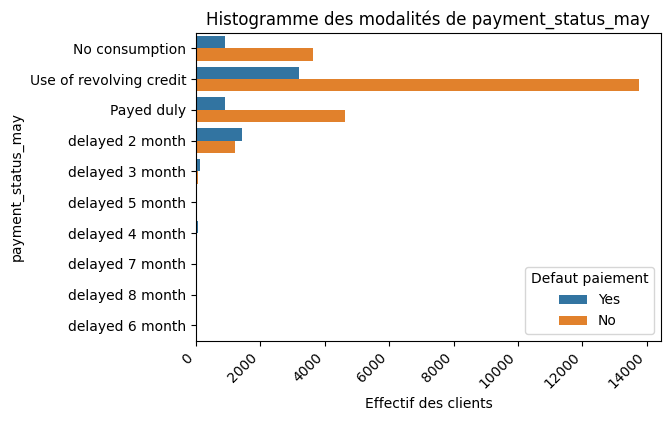

Tableau de comptage des valeurs avec pourcentages pour la variable 'payment_status_april':

                         Default_Yes  Ratio_Yes  Default_No  Ration_No
payment_status_april                                                  
Use of revolving credit         3069      46.25     13217.0      56.57
delayed 2 month                 1401      21.11      1365.0       5.84
No consumption                   981      14.78      3914.0      16.75
Payed duly                       975      14.69      4765.0      20.39
delayed 3 month                  118       1.78        66.0       0.28
delayed 7 month                   38       0.57         8.0       0.03
delayed 4 month                   31       0.47        18.0       0.08
delayed 6 month                   14       0.21         5.0       0.02
delayed 5 month                    7       0.11         6.0       0.03
delayed 8 month                    2       0.03         NaN        NaN




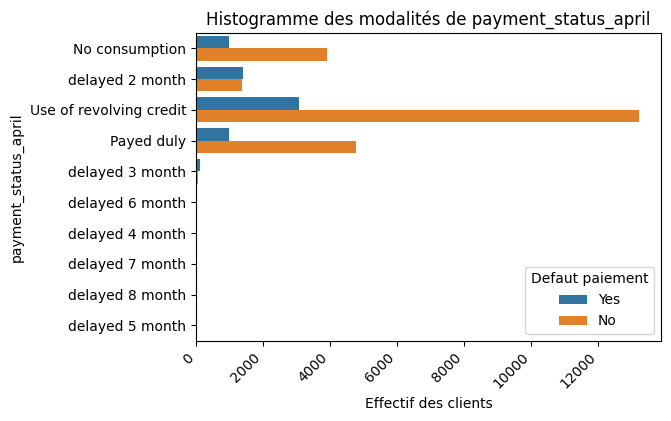

In [13]:
bivariate_statistics(df)

##### 4.2.2 Par la matrice des corrélations

In [14]:
numeric_corr = select_numeric_columns_corr(df)

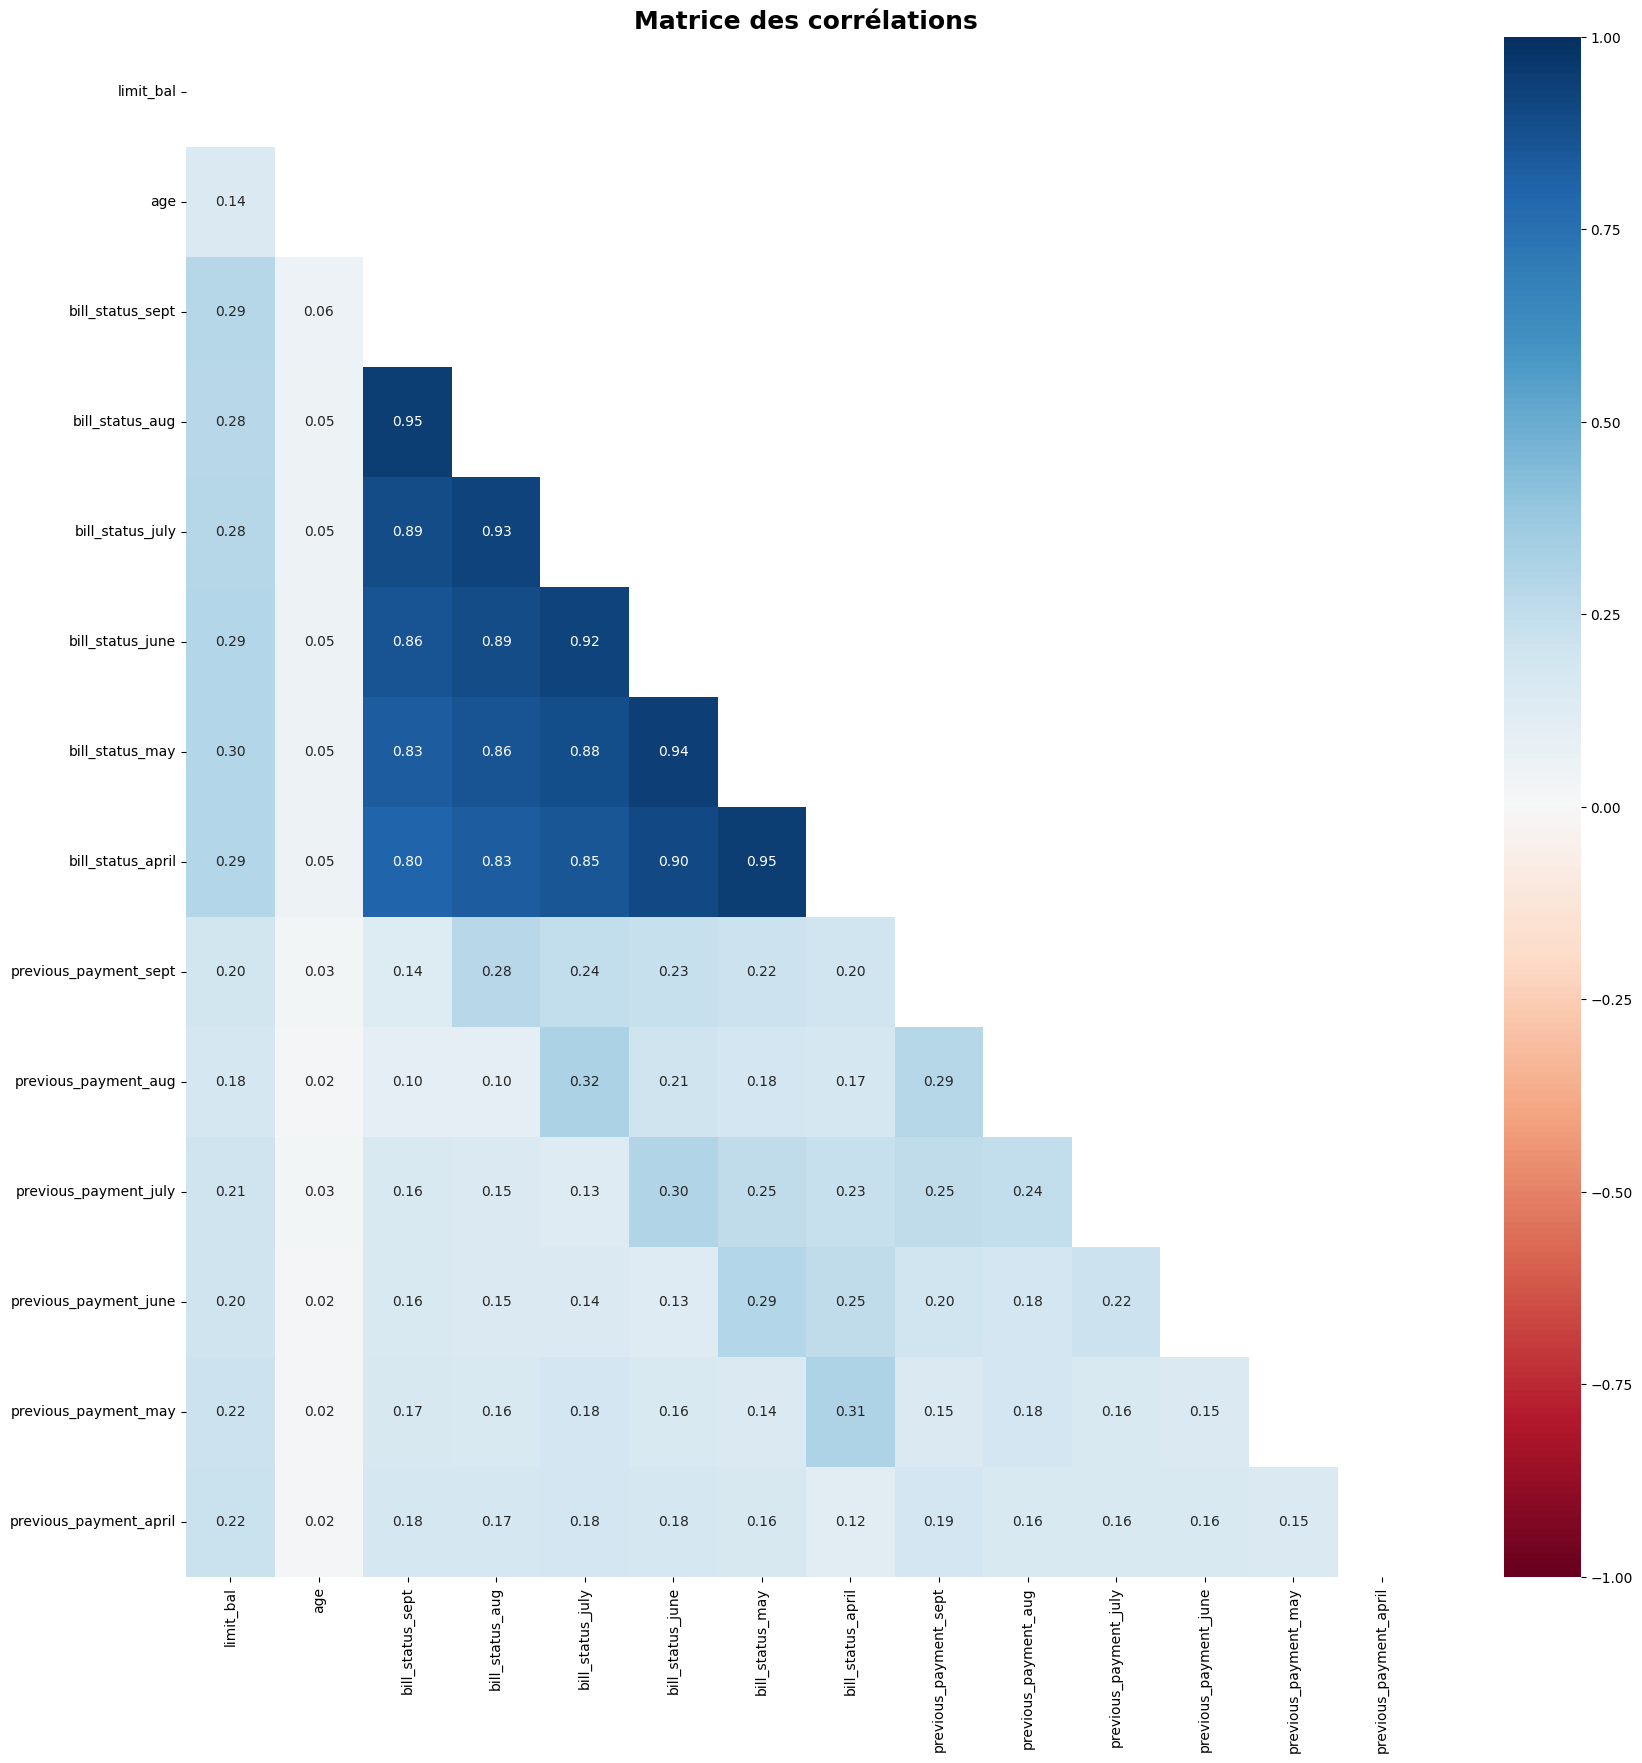

In [15]:
plot_correlation_matrix(numeric_corr)

##### 4.2.3 Par les boxplots

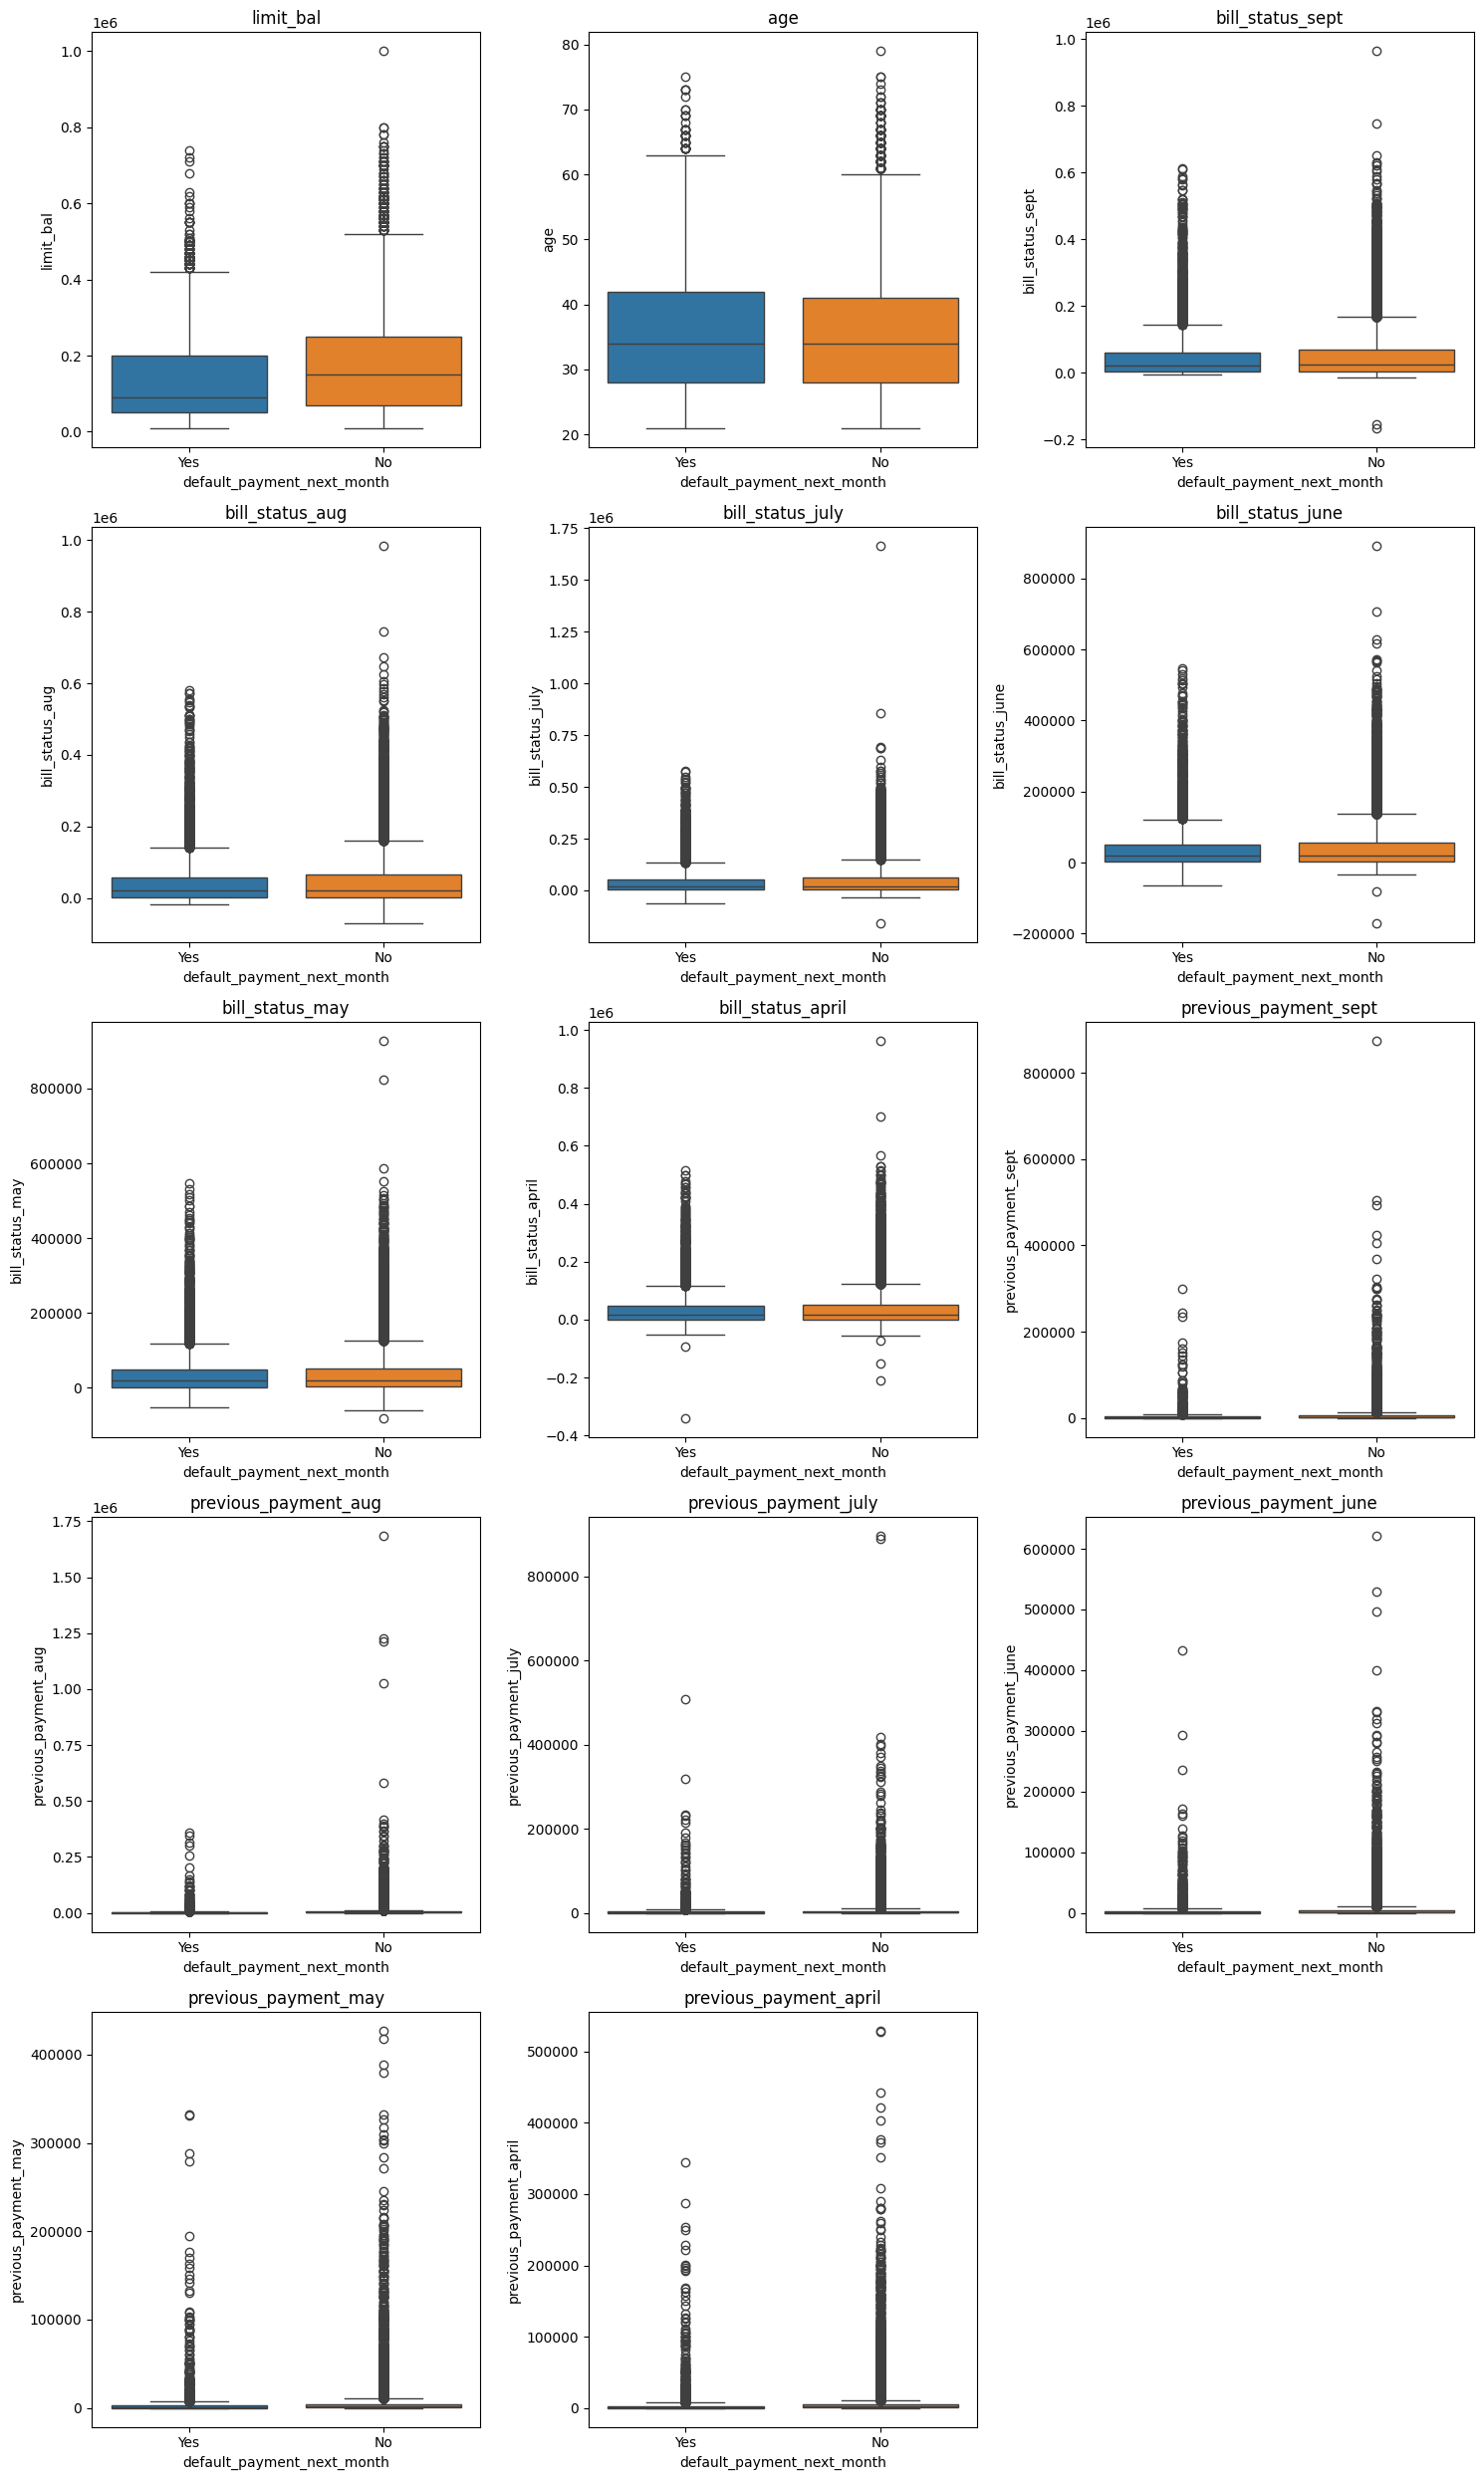

In [16]:
boxplot_numeric_variables(df)

##### 4.2.4 Analyses bivariées


Il s'agit ici de présenter les caractéristiques des clients qui peuvent expliquer ou susciter le phénomène d'insolvabilité.
Sur les 30000 clients de la banque, 6636 d'entre eux n'ont pas remboursé leur crédit. Dans le cadre de cette étude, les clients de sexe féminin représentent plus de la moitié de l'effectif des clients de la banque en situation de défaut de remboursement, soit 3763 clientes pour un ration de 56.71 %. Les clients de sexe masculin quant à eux représentent 43.29 % de l'effectif total en situation de défaut de remboursement. 

Nous constatons que l'insolvabilité s'observe la plupart du temps sur les clients ayant un parcours universitaire ou grande école. Ces deux catégories représentent 80.86 % de l'effectif en situation d'insolvabilité, soit 5366 clients. Ceux ayant essentiellement un parcours d'études secondaires représentent 18.64 %, soit 1237 clients. La catégorie de niveau d'éducation inhérente aux clients moins insolvables, 33 clients, n'est malheureusement pas labélisée; peut-être s'agit-il de ceux n'ayant qu'un parcours d'études primaires ou n'ayant clairement pas de parcours éducatif.

Les clients célibataires sont ceux chez qui l'on observe un taux plus élevé d'insolvabilité, un peu plus de la moitié de l'effectif des insolvables (50.35 %). Les clients en situation de mariage sont également fortement représentés avec un taux de 48.31 % de l'effectif des insolvables. Les autres, soit 89 clients pour 1.34 % ne représentent qu'une part résiduelle de cette catégorie de clients.

L'état de remboursement de Septembre révèle que les clients ayant eu recours au renouvellement de crédit sont les plus nombreux parmi ceux qui se sont retrouvés dans une situation d'insovabilité, avec un effectif de 1888 clients (28.45 %). ils sont suivis pas ceux ayant eu un retard de remboursement d'un et deux mois. Ces derniers représentent 46,66 % de l'effectif en situation d'insovabilité. Il est également important de relever que 954 clients avec un état de remboursement régulier se sont retrouvés parmi ceux qui n'ont pas pu rembourser leur crédit.

La matrice des corrélations nous révèle également que la facture du mois M est fortement correlée à celle du mois M-1.
L'analyse de la boite à moustache révèle que l'insolvabilité s'observe en moyenne beaucoup plus sur les clients ayant contracté un montant de crédit relativement faible.

#### 4.4 Élimination et vérification des outliers

In [17]:
remove_outliers(df)

<Figure size 1500x0 with 0 Axes>

#### 5. PREPROCESSING

In [18]:
# Formatage du dataset
df = re_transform_dataset(df)

In [19]:
df = importer_affichage_dataset('default_of_credit_card_clients_for_model.csv')
df.head()

,limit_bal,sex,education,marriage,age,payment_status_sept,payment_status_aug,payment_status_july,payment_status_june,payment_status_may,...,bill_status_june,bill_status_may,bill_status_april,previous_payment_sept,previous_payment_aug,previous_payment_july,previous_payment_june,previous_payment_may,previous_payment_april,default_payment_next_month
0,20000.0,2,2,1,24.0,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,Yes
1,120000.0,2,2,2,26.0,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,Yes
2,90000.0,2,2,2,34.0,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,No
3,50000.0,2,2,1,37.0,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,No
4,50000.0,1,2,1,57.0,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,No


In [20]:
count_variable_types(df)

,Variable Type,Count
0,Categorical,1
1,Numeric,23


In [21]:
df.head()

,limit_bal,sex,education,marriage,age,payment_status_sept,payment_status_aug,payment_status_july,payment_status_june,payment_status_may,...,bill_status_june,bill_status_may,bill_status_april,previous_payment_sept,previous_payment_aug,previous_payment_july,previous_payment_june,previous_payment_may,previous_payment_april,default_payment_next_month
0,20000.0,2,2,1,24.0,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,Yes
1,120000.0,2,2,2,26.0,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,Yes
2,90000.0,2,2,2,34.0,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,No
3,50000.0,2,2,1,37.0,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,No
4,50000.0,1,2,1,57.0,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,No


#### 6. SEPARATION DES VARIABLES ET DU JEU DE DONNEES

#### 6.1 Séparation des variables explicatives de la variable expliquée

In [22]:
# Séparation de la variable expliquée Y des variables explicatives X
X = df.drop(['default_payment_next_month'], axis = 1)
y = df['default_payment_next_month']

In [23]:
# Sélection des colonnes catégorielles
# categorical_vars = X.select_dtypes(include=['object']).columns.tolist()
categorical_vars = ['sex', 'education', 'marriage']

In [24]:
ordinal_vars = ['payment_status_sept',
                'payment_status_aug',
                'payment_status_july',
                'payment_status_june',
                'payment_status_may',
                'payment_status_april']

In [25]:
# Sélection des colonnes numériques
numerical_vars = [nv for nv in X.columns if nv not in categorical_vars]
numerical_vars

['limit_bal',
 'age',
 'payment_status_sept',
 'payment_status_aug',
 'payment_status_july',
 'payment_status_june',
 'payment_status_may',
 'payment_status_april',
 'bill_status_sept',
 'bill_status_aug',
 'bill_status_july',
 'bill_status_june',
 'bill_status_may',
 'bill_status_april',
 'previous_payment_sept',
 'previous_payment_aug',
 'previous_payment_july',
 'previous_payment_june',
 'previous_payment_may',
 'previous_payment_april']

In [26]:
del(numerical_vars[2:9])
numerical_vars

['limit_bal',
 'age',
 'bill_status_aug',
 'bill_status_july',
 'bill_status_june',
 'bill_status_may',
 'bill_status_april',
 'previous_payment_sept',
 'previous_payment_aug',
 'previous_payment_july',
 'previous_payment_june',
 'previous_payment_may',
 'previous_payment_april']

In [27]:
X_typed = pd.concat([df[categorical_vars], df[ordinal_vars], df[numerical_vars]], axis=1)

In [28]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
seed = 42


# Pour les variables catégorielles nominales
num_transform = Pipeline(steps=[
    ('sc', StandardScaler())
])

# Pour les variables numériques
cat_transform = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Pour les variables numériques
ord_transform = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])

# Créez le ColumnTransformer 
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transform, categorical_vars),  # OneHotEncoder pour les variables catégorielles
        ('ord', ord_transform, ordinal_vars),  # OrdinalEncoder pour les variables ordinales
        ('num', num_transform, numerical_vars)    # Standardiser pour les variables numériques
    ])

# Définissons le modèle RandomForestClassifier
rfc_model = RandomForestClassifier(random_state=seed)

# Créez le pipeline avec le preprocessor et le modèle RandomForestClassifier
rfc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rfc_model)
])

# Définissons le modèle LogisticRegression
lr_model = LogisticRegression(random_state=seed)

# Créez le pipeline avec le preprocessor et le modèle LogisticRegression
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', lr_model)
])

# Définir les pipelines pour chaque modèle
pipelines = {
    'RandomForestClassifier': rfc_pipeline,
    'LogisticRegression': lr_pipeline
}

#### 6.2 Séparation du jeu de données en trois parties : entrainement, validation et test

In [29]:
# Séparation des données d'entrainement, de validation et de test
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_typed, y, test_size=0.4, random_state = seed, stratify = y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = seed, stratify = y_temp)

In [30]:
# Entraîner les deux modèles sur les données d'entraînement
for model_name, pipeline in pipelines.items():
    print(f"Entraînement du modèle {model_name}:")
    pipeline.fit(X_train, y_train)

Entraînement du modèle RandomForestClassifier:
Entraînement du modèle LogisticRegression:


#### 7. Evaluation des modèles, Réglage des Hyperparamètres (GridSearchCV) et Choix du meilleur modèle

Evaluation du modèle RandomForestClassifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4673
           1       0.62      0.33      0.43      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.64      0.66      6000
weighted avg       0.79      0.81      0.78      6000



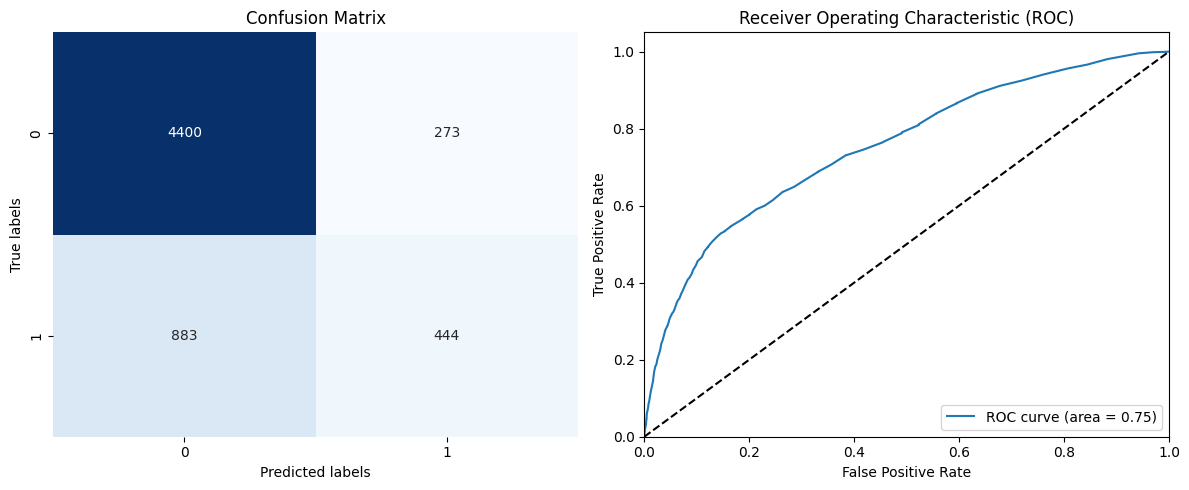

Evaluation du modèle LogisticRegression:
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      4673
           1       0.64      0.23      0.34      1327

    accuracy                           0.80      6000
   macro avg       0.73      0.60      0.61      6000
weighted avg       0.78      0.80      0.76      6000



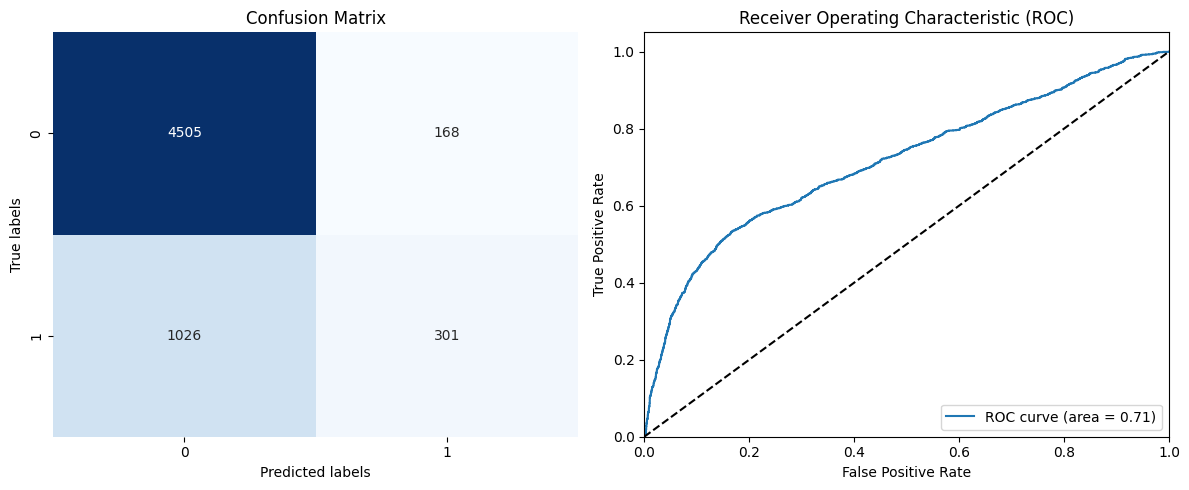

Meilleur modèle sélectionné:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['sex', 'education',
                                                   'marriage']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['payment_status_sept',
                                                   'payment_status_aug',
                                                   'payment_status_july',
                                                   'payment_status_june',
                                                   'payment_sta

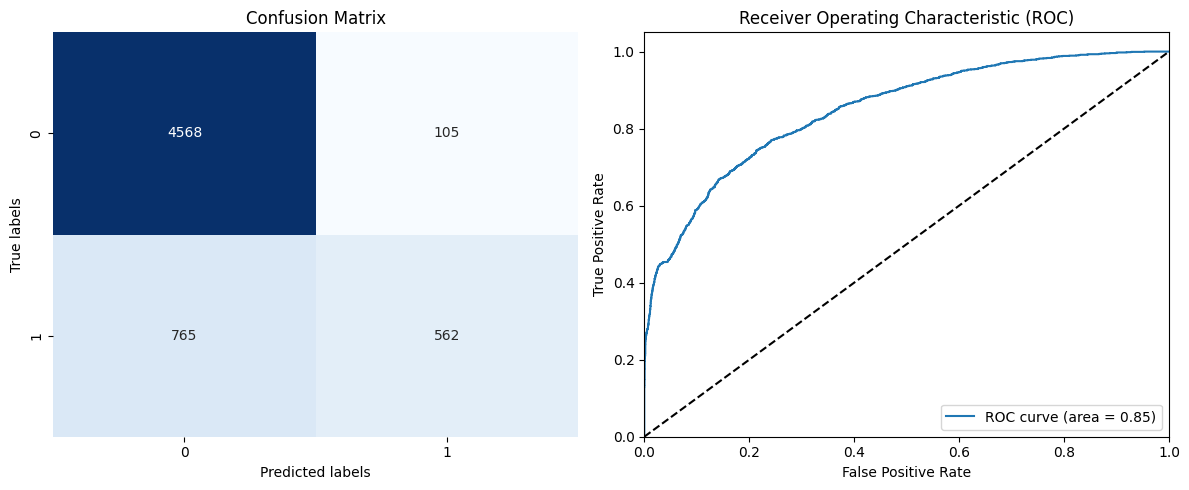

(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('cat',
                                                   Pipeline(steps=[('onehot',
                                                                    OneHotEncoder())]),
                                                   ['sex', 'education',
                                                    'marriage']),
                                                  ('ord',
                                                   Pipeline(steps=[('ordinal',
                                                                    OrdinalEncoder())]),
                                                   ['payment_status_sept',
                                                    'payment_status_aug',
                                                    'payment_status_july',
                                                    'payment_status_june',
                                                    'payment_status_may',
     

In [31]:
evaluate_and_find_best_model(pipelines, X_val, y_val, X_train, y_train, X_test, y_test)